In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'limit': 10
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    json_ = response.json()
    with open('data.json', 'w') as f:
        json.dump(json_, f)
    #data = json.loads(response.text)
    #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [2]:
import json

In [3]:
import json
 
with open("data.json", "r") as file:
    data = json.load(file)
 
    print("Data retrieved")

Data retrieved


In [4]:
list_ = []
for i in range(len(data['data'])):
    cryp_dict = {}
    cryp_dict['symbol'] = data['data'][i]['symbol']
    cryp_dict['max_supply'] = data['data'][i]['max_supply']
    cryp_dict['circulating_supply'] = data['data'][i]['circulating_supply']
    cryp_dict['total_supply'] = data['data'][i]['total_supply']
    cryp_dict['market_cap'] = data['data'][i]['quote']['USD']['market_cap']
    cryp_dict['price'] = data['data'][i]['quote']['USD']['price']
    cryp_dict['volume_24h'] = data['data'][i]['quote']['USD']['volume_24h']
    cryp_dict['percent_change_24h'] = data['data'][i]['quote']['USD']['percent_change_24h']
    cryp_dict['percent_change_7d'] = data['data'][i]['quote']['USD']['percent_change_7d']
    cryp_dict['percent_change_30d'] = data['data'][i]['quote']['USD']['percent_change_30d']
    cryp_dict['percent_change_60d'] = data['data'][i]['quote']['USD']['percent_change_60d']
    list_.append(cryp_dict)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
#list_[0]['quote']['USD']

In [11]:
df = pd.DataFrame(list_)

In [12]:
df.head()

,symbol,max_supply,circulating_supply,total_supply,market_cap,price,volume_24h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d
0,BTC,21000000.0,1.907352e+07,1.907352e+07,3.988036e+11,20908.753709,2.912636e+10,2.150565,-5.065315,-30.169350,-47.227045
1,ETH,NaN,1.212572e+08,1.212572e+08,1.364751e+11,1125.501268,1.589659e+10,0.521542,-5.349017,-44.002122,-62.086963
2,USDT,NaN,6.749508e+10,6.861062e+10,6.742967e+10,0.999031,5.025393e+10,0.009929,0.010202,0.009410,-0.122315
3,USDC,NaN,5.585130e+10,5.585130e+10,5.587206e+10,1.000372,5.041333e+09,-0.009195,0.001221,0.009069,0.023212
4,BNB,165116760.0,1.632770e+08,1.632770e+08,3.599199e+10,220.435174,1.160329e+09,2.197782,0.239510,-30.403272,-46.020470


<AxesSubplot:xlabel='symbol', ylabel='market_cap'>

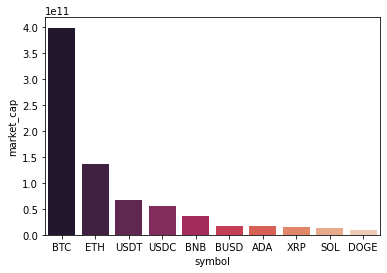

In [13]:
sns.barplot(x="symbol", y="market_cap", palette="rocket", data=df)

<AxesSubplot:xlabel='symbol', ylabel='circulating_supply'>

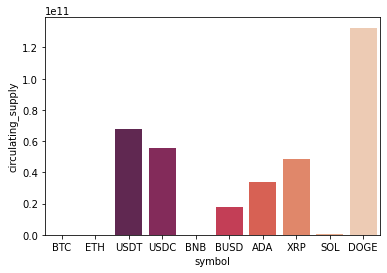

In [17]:
sns.barplot(x="symbol", y="circulating_supply", palette="rocket", data=df)

In [18]:
from datetime import datetime,timedelta

print(datetime.now().strftime('%Y-%m-%d'))
df['date'] = datetime.now().strftime('%Y-%m-%d')
df['date_24h'] = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
df['date_30d'] = (datetime.now() - timedelta(days=30)).strftime('%Y-%m-%d')
df['date_60d'] = (datetime.now() - timedelta(days=60)).strftime('%Y-%m-%d')

2022-06-21


In [19]:
df.head()

,symbol,max_supply,circulating_supply,total_supply,market_cap,price,volume_24h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,date,date_24h,date_30d,date_60d
0,BTC,21000000.0,1.907352e+07,1.907352e+07,3.988036e+11,20908.753709,2.912636e+10,2.150565,-5.065315,-30.169350,-47.227045,2022-06-21,2022-06-20,2022-05-22,2022-04-22
1,ETH,NaN,1.212572e+08,1.212572e+08,1.364751e+11,1125.501268,1.589659e+10,0.521542,-5.349017,-44.002122,-62.086963,2022-06-21,2022-06-20,2022-05-22,2022-04-22
2,USDT,NaN,6.749508e+10,6.861062e+10,6.742967e+10,0.999031,5.025393e+10,0.009929,0.010202,0.009410,-0.122315,2022-06-21,2022-06-20,2022-05-22,2022-04-22
3,USDC,NaN,5.585130e+10,5.585130e+10,5.587206e+10,1.000372,5.041333e+09,-0.009195,0.001221,0.009069,0.023212,2022-06-21,2022-06-20,2022-05-22,2022-04-22
4,BNB,165116760.0,1.632770e+08,1.632770e+08,3.599199e+10,220.435174,1.160329e+09,2.197782,0.239510,-30.403272,-46.020470,2022-06-21,2022-06-20,2022-05-22,2022-04-22


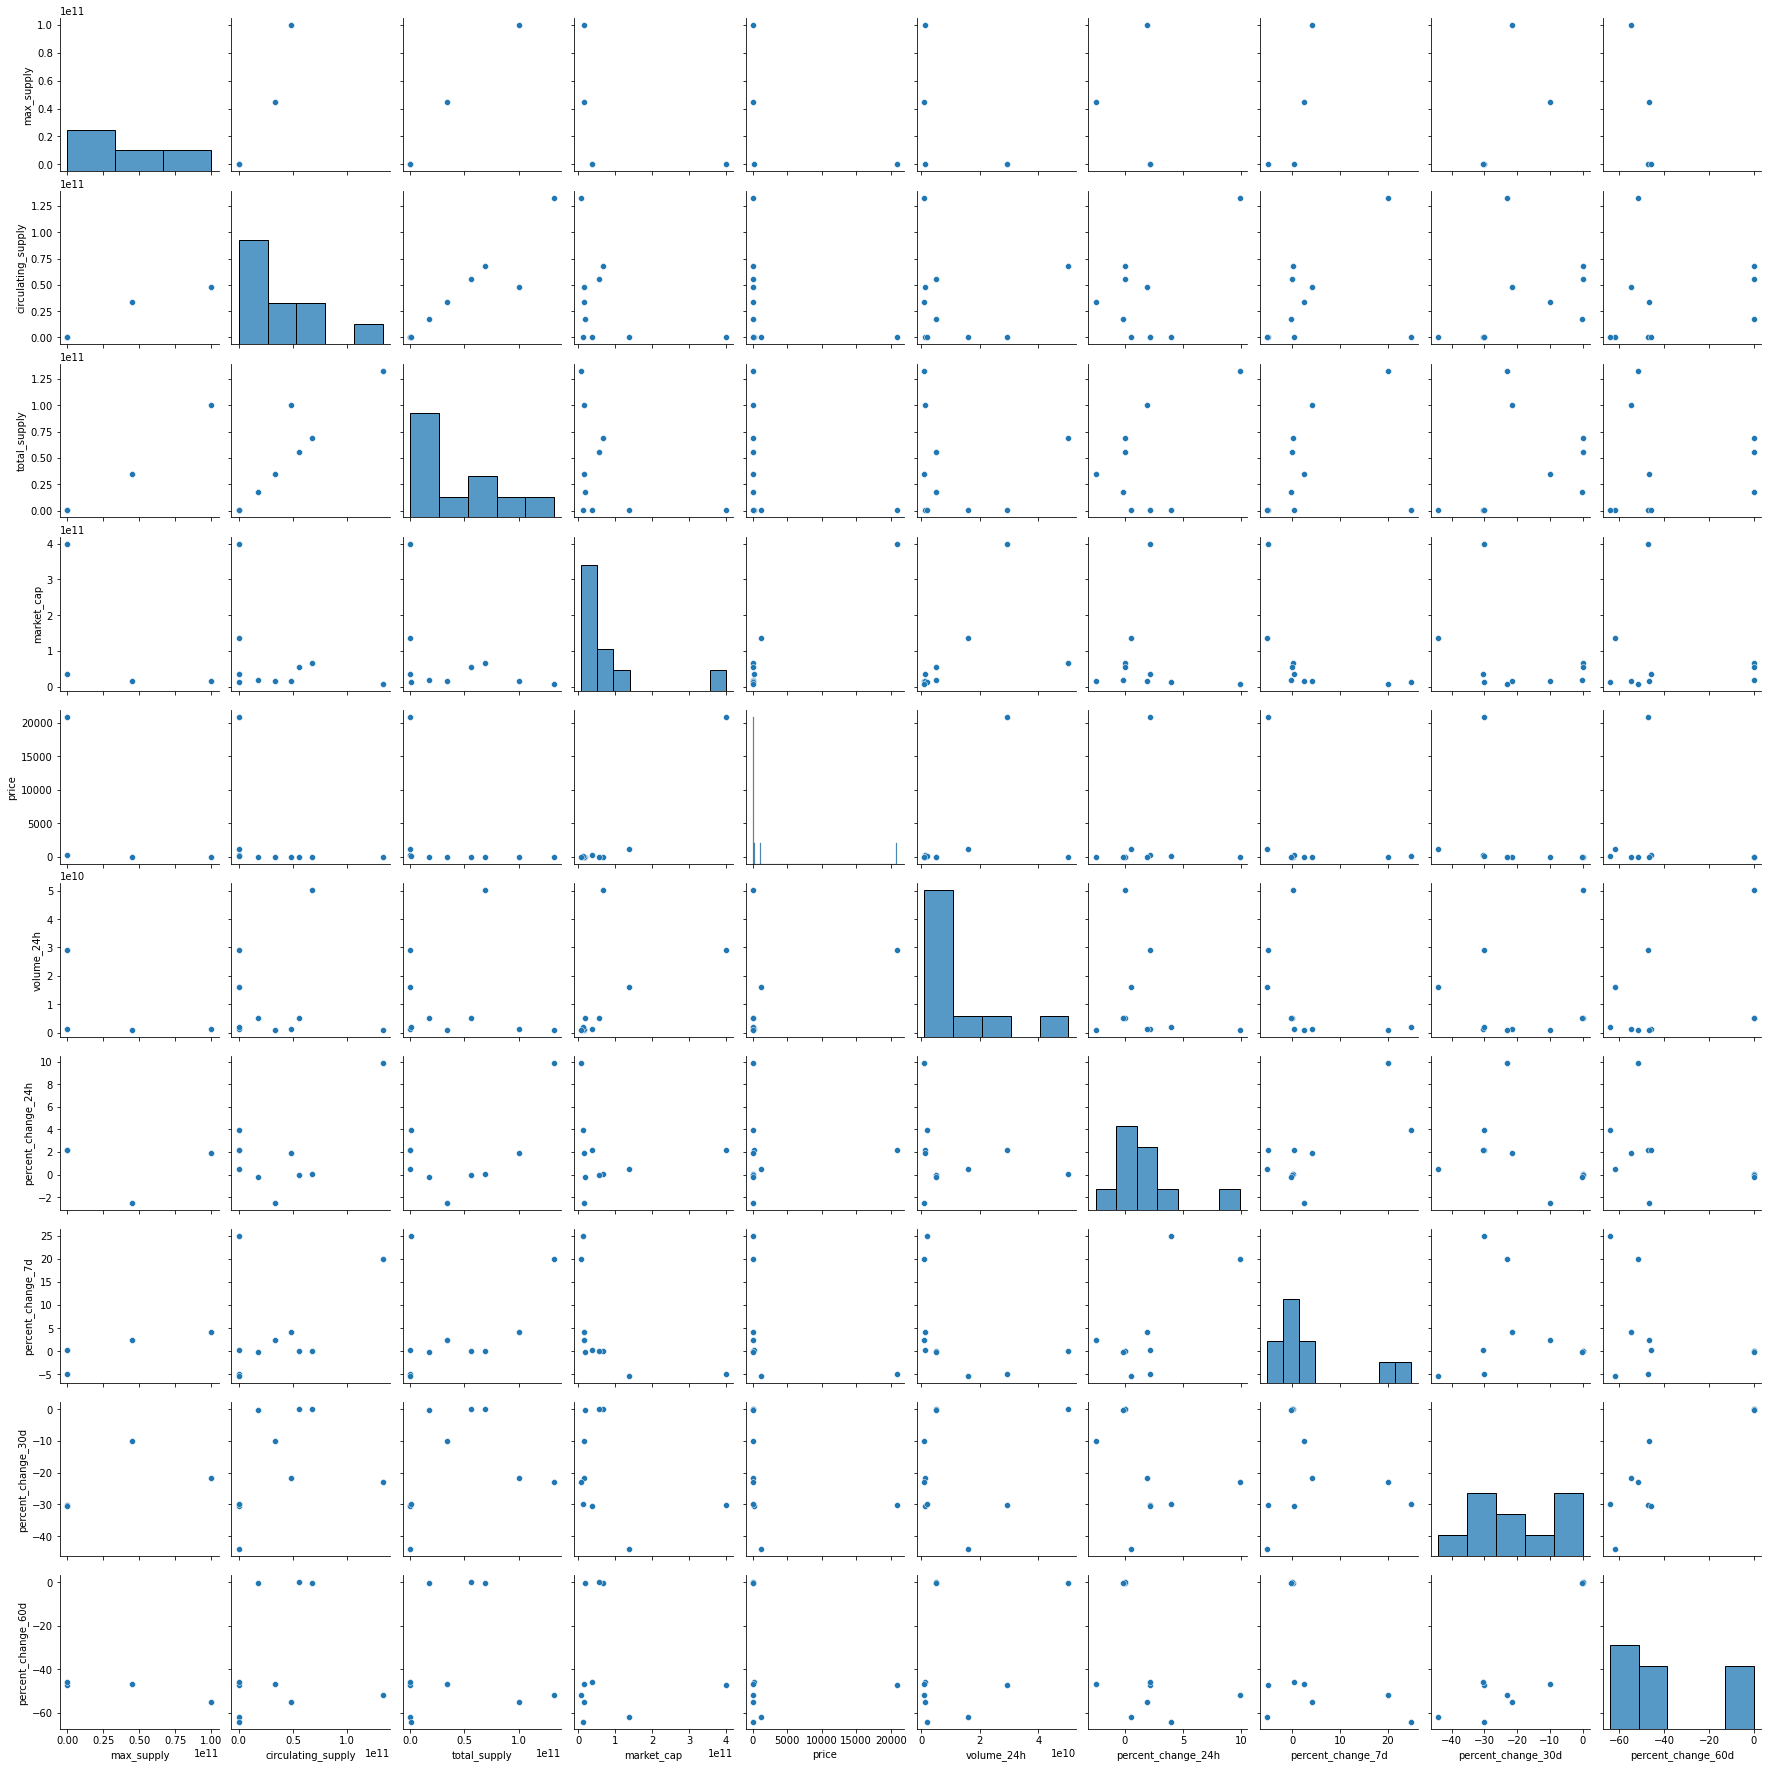

In [20]:
sns.pairplot(df)

<AxesSubplot:xlabel='symbol', ylabel='price'>

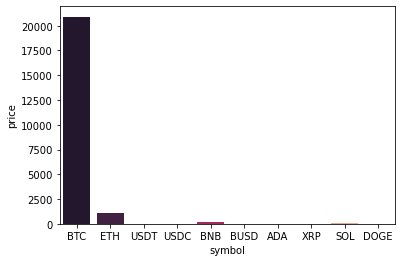

In [21]:
sns.barplot(x="symbol", y="price", palette="rocket", data=df)

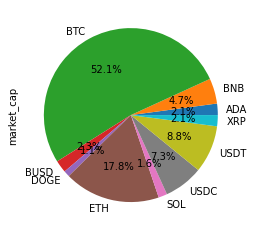

In [22]:
data = df.groupby("symbol")["market_cap"].sum()
data.plot.pie(autopct="%.1f%%");